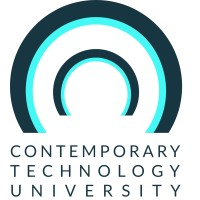

# **Final Project for Course: Python Foundations**

## **Project Topic: Using Unsupervised Machine Learning to Cluster Countries According to Their Needs**

# **Submitted By:** 
# Gibson Opurum (202201062)
#                  Anthony Ogon (202202072)

# **Instructor:** Atlas Khan

# Date: Friday, February 4, 2022

# In partial fulfilment of the MSc in Computer Science, Machine Learning, and Artificial Intelligence Program

## 1.0 Abstract

Classify countries based on socioeconomic and health factors that influence the country's overall development.

The dataset for this analysis was collected by a non-profit called Help International. They want to find a solution to assist countries below the global poverty line.

We will limit our analysis to using KMeans clustering and the Hierarchical clustering algorithm to find countries that need the most help.

## 1.1 Introduction

HELP International is an *international* humanitarian organization dedicated to eradicating poverty and providing basic amenities and aid to individuals in developing nations during disasters and natural disasters. 

Our analysis will help, HELP International raise approximately $10 million dollars to alleviate poverty in the world's developing countries. But the NGO's CEO needs to figure out how to spend this money wisely and strategically.

The CEO must decide which countries are most desperate for assistance. As a result, our job as data scientists is to categorize countries based on socioeconomic and health characteristics that influence the country's overall development. Then we could advise which nations the CEO should concentrate on the most.

## 2.0 Methodology

In [ ]:
#Load ML Python libraries

import pandas as pd 
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as exp
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
# chose the csv files from local directory (csv with raw data downloaded in email invite)
# (click on the "choose files" button after running the cell)
from google.colab import files
uploaded = files.upload()

Saving Country-data.csv to Country-data.csv
Saving data-dictionary.csv to data-dictionary.csv


In [ ]:
#The the first csv files
df = pd.read_csv(
    io.BytesIO(uploaded['Country-data.csv']), encoding='utf-8')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
#Get the second csv file. This describes the columns in the dataset.
data_dict = pd.read_csv(
    io.BytesIO(uploaded['data-dictionary.csv']), encoding='utf-8')
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [ ]:
#Check for missing values
print(df.shape)
print(df.isna().sum())

(167, 10)
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [ ]:
#Drop duplicates rows from dataframe
df.drop_duplicates(inplace=True)

print(df.shape)

(167, 10)


## 3.0 Exploratory Data Analysis

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. Source: [Towards Data Science.](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15#:~:text=Exploratory%20Data%20Analysis%20refers%20to,summary%20statistics%20and%20graphical%20representations.)

In [ ]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

### 3.1 Univariate Analysis

Look for outliers in data columns.

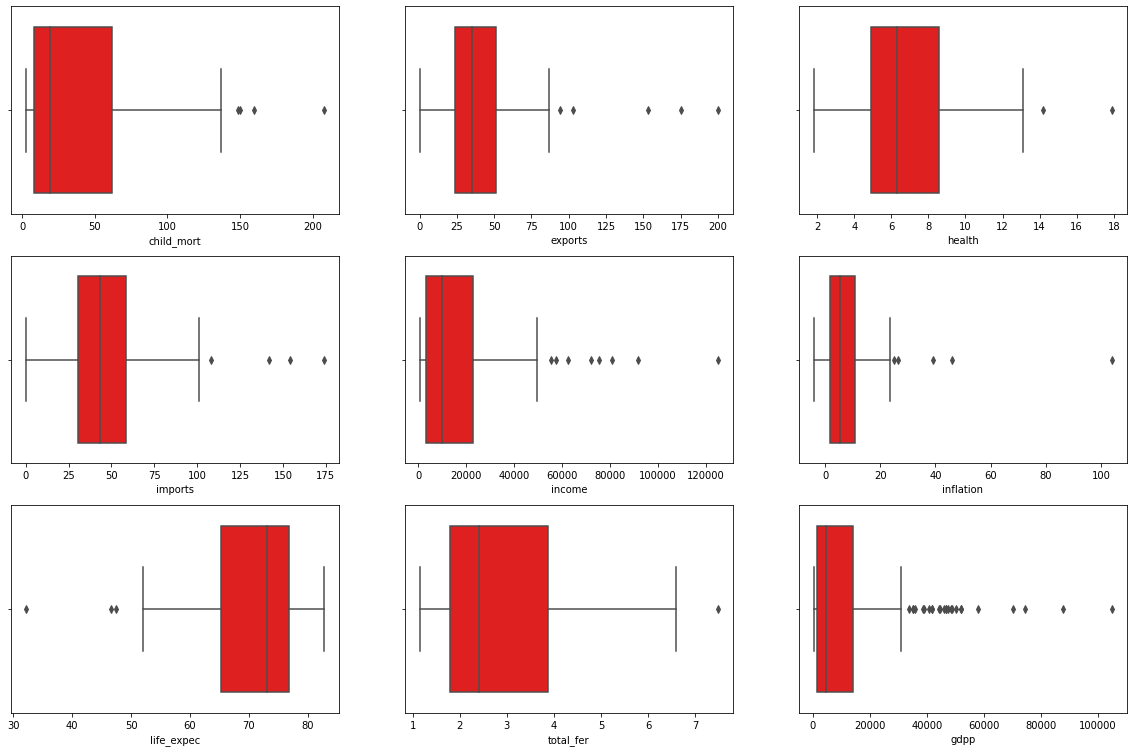

In [ ]:
fig,axs=plt.subplots(3,3,figsize=(20,13))
col=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
ax=axs.flatten()
for i,j in enumerate(col):
    sns.boxplot(x=df[j],ax=ax[i],color='red')

The graph above depicts our data distribution and the numerous outliers for each feature set. It's worth noting that not all of the features are dispersed evenly. The majority of the data, on the other hand, is normally distributed.

### 3.2 Multivariate Analysis

Let's examine the relationship between two or more variables and identifies which, if any, are related to a certain outcome.

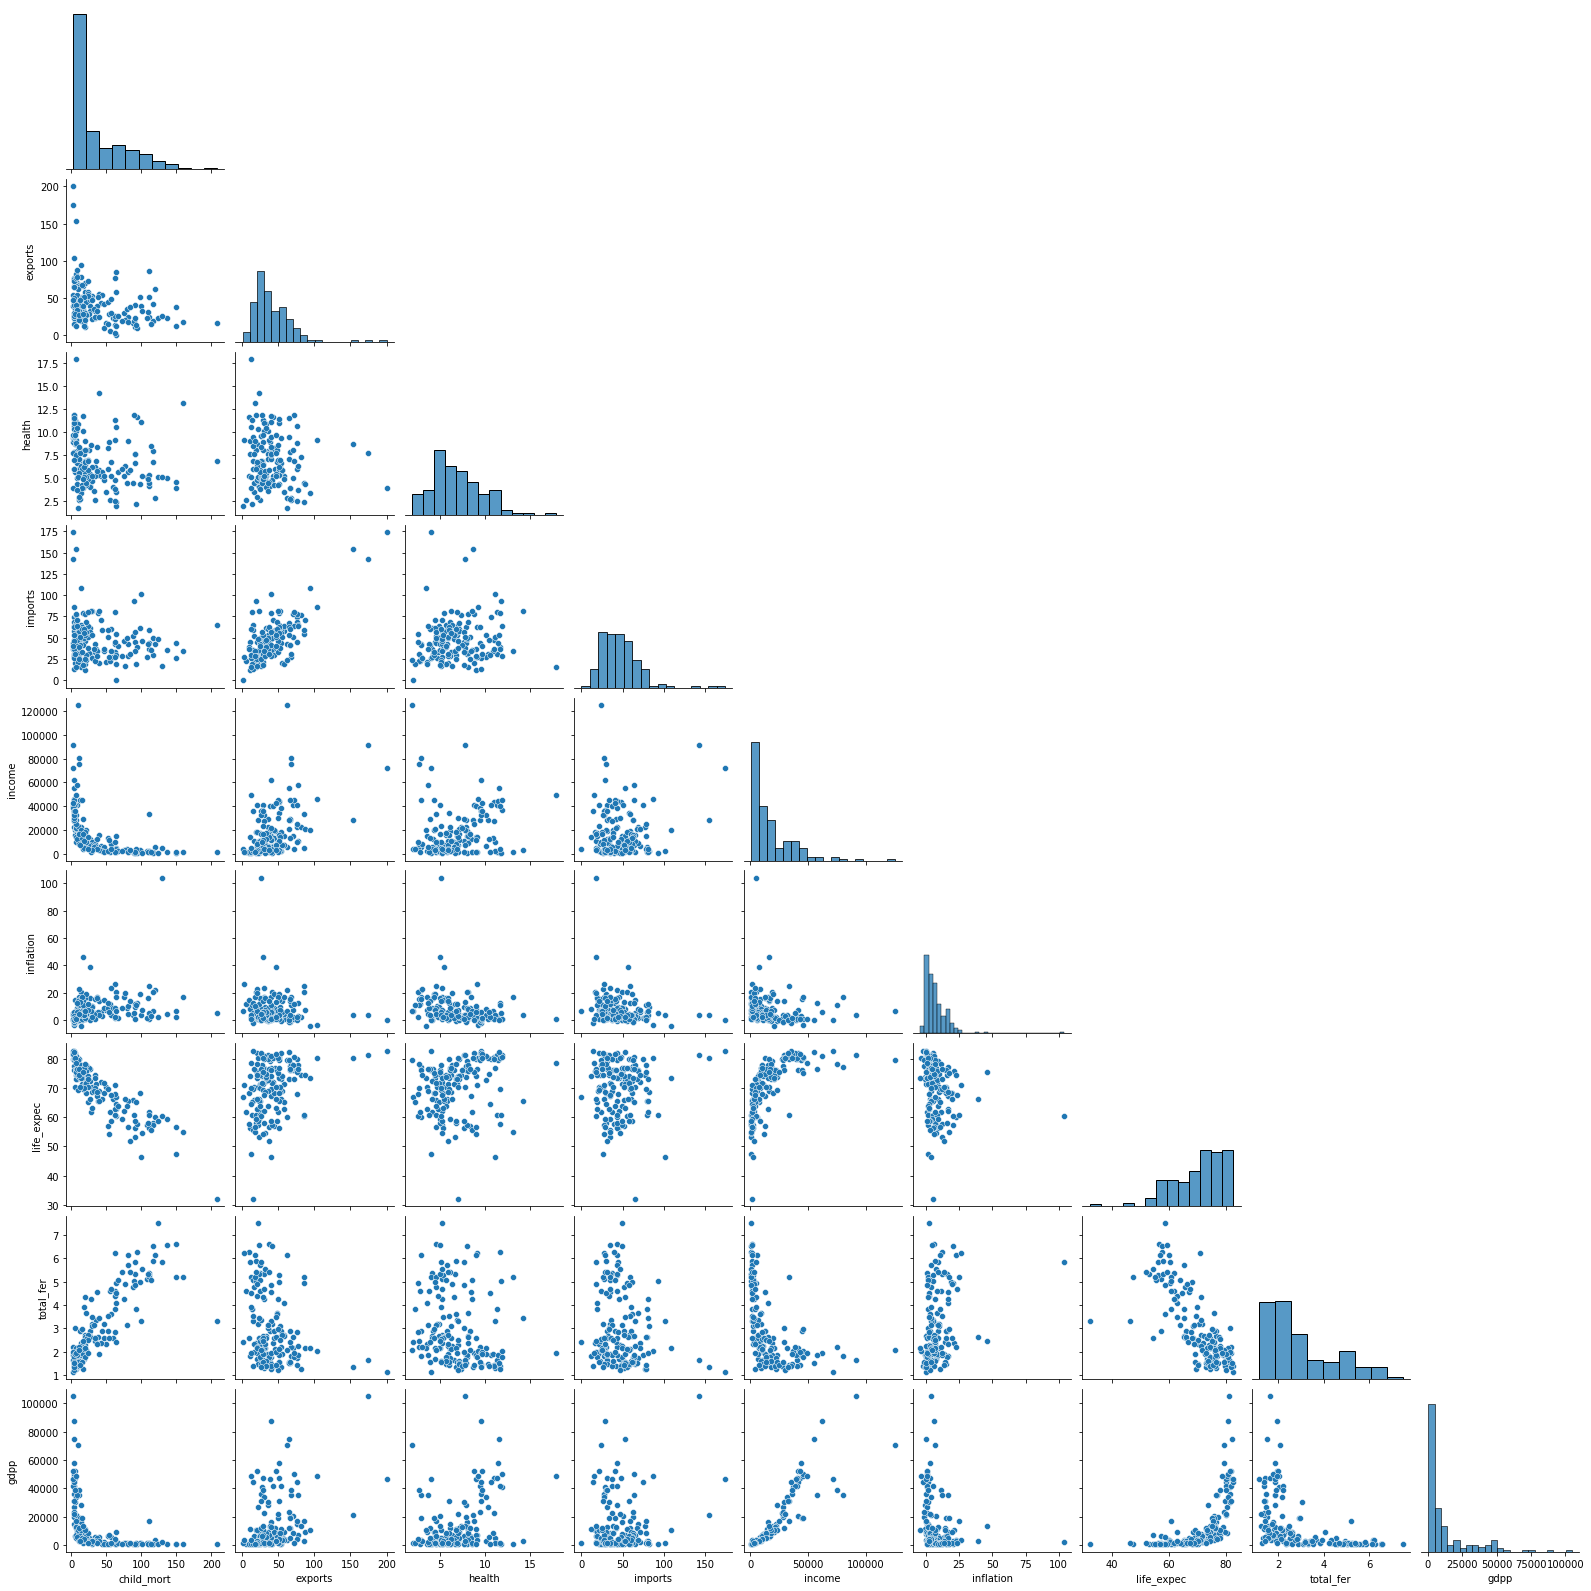

In [ ]:
sns.pairplot(df,corner=True)

As shown in the graph above, there appear to be several relationships. For instance, total_fer is strongly correlated with child_mort while life_expec is negatively correlated with child_mort. But life_expec seem to have a weak correlation with exports. We can say the same thing for most other features of the pairwise plot.

## 4.0 Correlation

In [ ]:
#Get data set correlation statistics
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


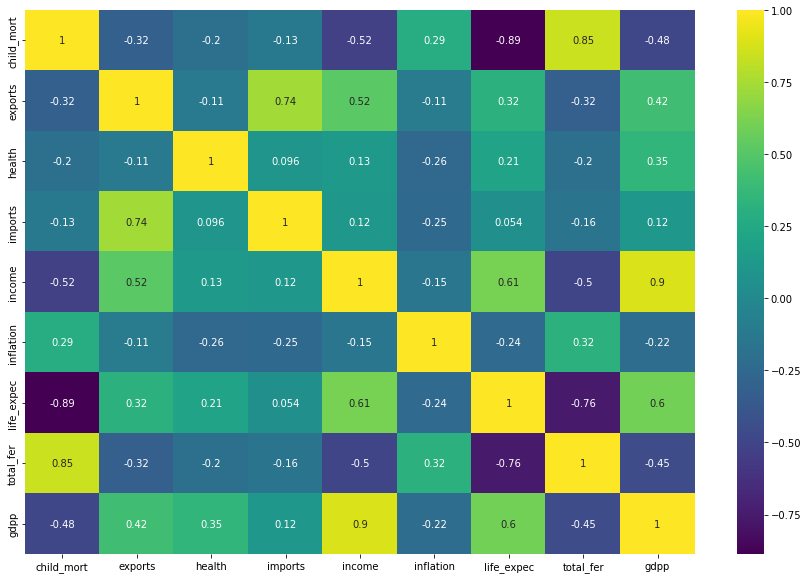

In [ ]:
#Use a heatmap to visualize the dataset correlation
fig = plt.figure(figsize=(15,10))
ax = sns.heatmap(df.corr(),annot=True,cmap = 'viridis')
plt.show()

We can see that the different colors show different correlations for our data from the heatmap. For example, yellow means strong correlation, whereas purple shows weak correlation.

## 5.0 Data Preprocessing

In [ ]:
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
#Scale the data set excluding the country column.
data=df.drop('country',axis=1)

In [ ]:
# #Import min-max scaler for scaling the dataframe.
# from sklearn.preprocessing import MinMaxScaler
# scalar = MinMaxScaler()

#Use standard scaler instead.
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
data=s.fit_transform(data);

## 6.0 Data Visualization

In [ ]:
#Get the GDP count
exp.histogram(data_frame=df,x = 'gdpp',nbins=167,opacity=0.75,barmode='overlay')

From the above plot, we see that the nations whose gross domestic product is less than 10k are many; up to 30 countries fall within this bracket, whereas fewer countries have GDP above 100k. Remember, our goal is to find out the developing countries that need help the most.

In [ ]:
#Get visualization for child mortality vs. health data for the various countries
exp.scatter(data_frame=df,x = 'child_mort',y = 'health',color='country')

## 7.0 K-Means Clustering

In [ ]:
#Elbow plot
from sklearn.cluster import KMeans

ssd = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    ssd.append(km.inertia_) 

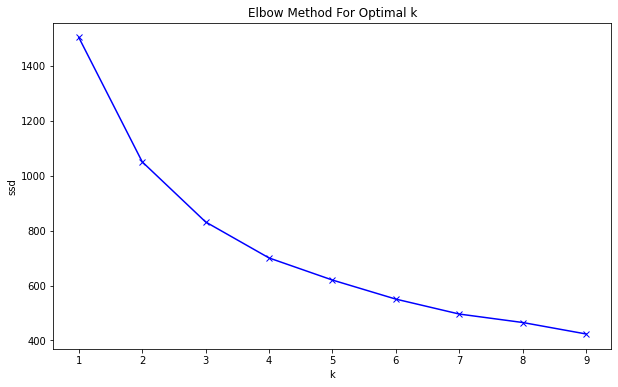

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('ssd')
plt.title('Elbow Method For Optimal k')
plt.show()

Because of the substantial difference errors in the elbow plot, k=3,4 is a good choice. To choose between the two, we choose with silhouette score.

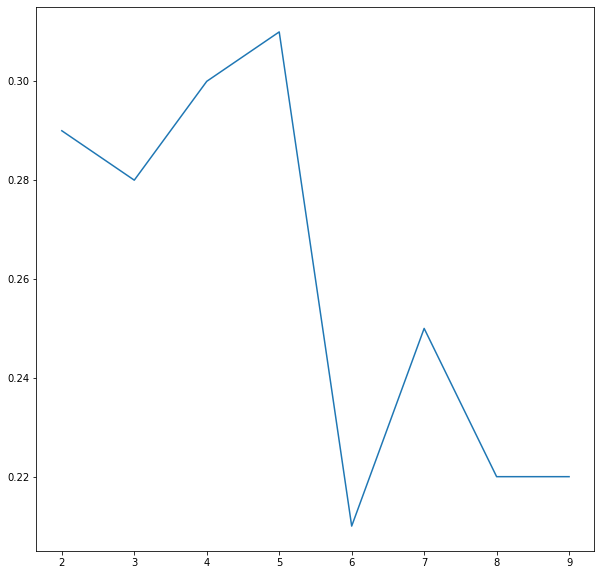

In [ ]:
#Finding the optimum K to cluster the data set using the silhouette score.
score=[]
plt.figure(figsize=(10,10))
for i in range(2,10):
    k=KMeans(i)
    k.fit(data)
    score.append(np.round(silhouette_score(data,k.labels_),2))
plt.plot(range(2,10),score)

According to the graph above, k=4 has a higher silhouette score than k=3. Although however, k=5 shows a high silhouette score, but the number of clusters should not be too high. Thus we choose k=4.

In [ ]:
k=KMeans(n_clusters=4,random_state=42)
k.fit(data)
df['k_labels']=k.labels_

In [ ]:
pred = k.labels_
print(pred)

[1 0 0 1 0 0 0 2 2 0 0 0 0 0 0 2 0 1 0 0 0 1 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 0 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 0 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 3 0 1 1 0 0 1 3 1 0 0 0 0 0 0 1 0 1 0 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 3 0 2 0 1 2 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


In [ ]:
#Cluster GDP vs. Income
exp.scatter(data_frame= df,x = 'gdpp',y = 'income',color=k.labels_)

We can observe that as GDP increases, income goes up as well. When a country's GDP rises, its people's living standards go up with it.

## 8.0 Visualize the Clusters with PCA

Principal Component Analysis (PCA) is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning. High dimensionality means that the dataset has a large number of features. PCA can also be used to filter noisy datasets, such as image compression. Source: [Medium.](https://medium.com/apprentice-journal/pca-application-in-machine-learning-4827c07a61db#:~:text=Principal%20Component%20Analysis%20(PCA)%20is,a%20large%20number%20of%20features.&text=PCA%20can%20also%20be%20used,datasets%2C%20such%20as%20image%20compression.)

In [ ]:
#Perform linear dimensionality reduction on data using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_model = pca.fit_transform(data)
data_transform = pd.DataFrame(data = pca_model, columns = ['PCA1', 'PCA2'])
data_transform['Cluster'] = pred

In [ ]:
#Get the transformed data
data_transform.head()

,PCA1,PCA2,Cluster
0,-2.913025,0.095621,1
1,0.429911,-0.588156,0
2,-0.285225,-0.455174,0
3,-2.932423,1.695555,1
4,1.033576,0.136659,0


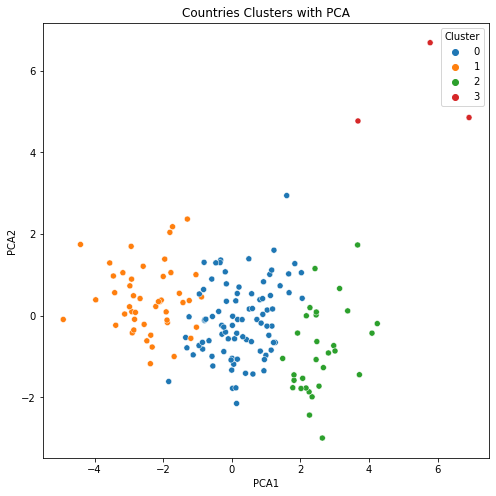

In [ ]:
#Using PCA, visualize country clusters.
plt.figure(figsize=(8,8))
g = sns.scatterplot(data=data_transform, x='PCA1', y='PCA2', palette=sns.color_palette()[:4], hue='Cluster')
title = plt.title('Countries Clusters with PCA')

We have successfully used KMeans and PCA analysis to decompose our dataset into clusters. However, having grouped the countries into clusters, we still do not know which countries need help the most. Therefore, to correctly classify these countries, we'll apply a different algorithm called hierarchical clustering, which will help us group them according to their level of need.

## 9.0 Hierarchial Clustering

We'll utilise hierarchical clustering to figure out which countries require assistance.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

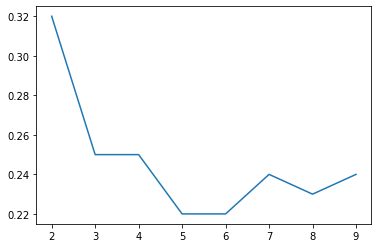

In [ ]:
score=[]
for i in range(2,10):
    a=AgglomerativeClustering(i)
    a.fit(data)
    score.append(np.round(silhouette_score(data,a.labels_),2))
plt.plot(range(2,10),score)

* The silhouette score of k=2 is good.

In [ ]:
#Cluster the data into two clusters using Agglomerative clustering.
a=AgglomerativeClustering(2)
a.fit(data)
df['hier_labels']=a.labels_

In [ ]:
#The "hier_labels" is added to dataframe.
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_labels,hier_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0


In [ ]:
df.drop('hier_labels',axis=1).groupby(['k_labels','country']).mean()

child_mort  exports  ...  total_fer      gdpp
k_labels country                                   ...                     
0        Albania                    16.6     28.0  ...       1.65    4090.0
         Algeria                    27.3     38.4  ...       2.89    4460.0
         Antigua and Barbuda        10.3     45.5  ...       2.13   12200.0
         Argentina                  14.5     18.9  ...       2.37   10300.0
         Armenia                    18.1     20.8  ...       1.69    3220.0
...                                  ...      ...  ...        ...       ...
2        United Kingdom              5.2     28.2  ...       1.92   38900.0
         United States               7.3     12.4  ...       1.93   48400.0
3        Luxembourg                  2.8    175.0  ...       1.63  105000.0
         Malta                       6.8    153.0  ...       1.36   21100.0
         Singapore                   2.8    200.0  ...       1.15   46600.0

[167 rows x 9 columns]

Replace labels with 'Needs help' or 'Is Self-sufficient'

In [ ]:
def func(x):
    if x==0:
        return 'Needs help priority-1' 
    elif x==1:
        return 'Needs help priority-2'
    elif x==2:
        return 'Needs help priority-3'
    else:
        return 'Is Self-sufficient'
df['k_labels']=df['k_labels'].map(lambda x: func(x))

In [ ]:
df.drop('k_labels',axis=1).groupby(['hier_labels','country']).mean()

child_mort  exports  ...  total_fer     gdpp
hier_labels country                                    ...                    
0           Afghanistan                 90.2     10.0  ...       5.82    553.0
            Albania                     16.6     28.0  ...       1.65   4090.0
            Algeria                     27.3     38.4  ...       2.89   4460.0
            Angola                     119.0     62.3  ...       6.16   3530.0
            Antigua and Barbuda         10.3     45.5  ...       2.13  12200.0
...                                      ...      ...  ...        ...      ...
1           Sweden                       3.0     46.2  ...       1.98  52100.0
            Switzerland                  4.5     64.0  ...       1.52  74600.0
            United Arab Emirates         8.6     77.7  ...       1.87  35000.0
            United Kingdom               5.2     28.2  ...       1.92  38900.0
            United States                7.3     12.4  ...       1.93  48400.0

[167 rows x 9 columns]

In [ ]:
def func(x):
    if x==0:
        return 'Needs help'
    else:
        return 'Is Self-sufficient'
df['hier_labels']=df['hier_labels'].map(lambda x: func(x))

In [ ]:
df.head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_labels,hier_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,Needs help priority-2,Needs help
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,Needs help priority-1,Needs help
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,Needs help priority-1,Needs help
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,Needs help priority-2,Needs help
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,Needs help priority-1,Needs help
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,Needs help priority-1,Needs help
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,Needs help priority-1,Needs help
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,Needs help priority-3,Is Self-sufficient
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,Needs help priority-3,Is Self-sufficient
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,Needs help priority-1,Needs help


## 10.0 Result

In [ ]:
print('Based on K-Means clustering, the countries that require the most assistance (on priority-1) are:')
df.loc[df['k_labels']=='Needs help priority-1']['country'].to_list()

Based on K-Means clustering, the countries that require the most assistance (on priority-1) are:


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Slovak Republic',
 'Solomon Islands',
 'Sri Lanka',
 'St. Vincent an

In [ ]:
print('Based on Hierarchial clustering, the countries that require the most assistance are:')
df.loc[df['hier_labels']=='Needs help']['country'].to_list()

Based on Hierarchial clustering, the countries that require the most assistance are:


['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Gabon',
 'Gambia',
 'Georgia',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Lithuania',
 'Macedonia, FYR',
 

### 10.1 Summary

* From the preceding, we are recommending this machine learning model to "HELP International" to assist with their humanitarian work because it has correctly clustered the countries according to the level of their needs. Our client now knows which countries need the most help, and they now know how to apportion the 10 million dollar largesse.

* To further strengthen the model, we recommend that "Help International" consults with a subject matter expert who may have additional need-based suggestions for the various countries. It would help with modeling the data to increase model performance and ensure that the algorithms employed and the results obtained are equitable for all nations represented. It is so that the model developed isn't biased in favor of any country or group.

### References

Help International --- https://help-international.org/

PCA: Application in Machine Learning --- https://bit.ly/3skwHv9

Exploratory Data Analysis --- https://bit.ly/35NMyuB